# Mohamed Mohamed 670006
## importing the  necessary packages

In [2]:
import csv
import pandas as pd       # for data manipulation and analysis
import numpy as np        # for numerical computing
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns     # for data visualization

## reading the files into pandas 
## the polutants are No2, O3, and PM25
## the time frame Mar, Apr, and May 2024

In [3]:
# Reading the csv files into a DataFrame
mar = pd.read_csv('TORONTO_CANADA_Mar2024.csv')
apr = pd.read_csv('TORONTO_CANADA_Apr2024.csv')
may = pd.read_csv('TORONTO_CANADA_May_2024.csv')

# Merging the different files into a single DataFrame
toronto = pd.concat([mar,apr,may],ignore_index=True)

# Printing the first five observations
toronto.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,7570,Toronto Downtown,no2,0.015,ppm,2024-03-01T01:00:00+00:00,2024-02-29T20:00:00-05:00,America/Toronto,43.64543,-79.38908,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1,7570,Toronto Downtown,no2,0.017,ppm,2024-03-01T02:00:00+00:00,2024-02-29T21:00:00-05:00,America/Toronto,43.64543,-79.38908,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
2,7570,Toronto Downtown,no2,0.016,ppm,2024-03-01T03:00:00+00:00,2024-02-29T22:00:00-05:00,America/Toronto,43.64543,-79.38908,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
3,7570,Toronto Downtown,no2,0.015,ppm,2024-03-01T04:00:00+00:00,2024-02-29T23:00:00-05:00,America/Toronto,43.64543,-79.38908,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
4,7570,Toronto Downtown,no2,0.019,ppm,2024-03-01T05:00:00+00:00,2024-03-01T00:00:00-05:00,America/Toronto,43.64543,-79.38908,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


## Data Description

In [4]:
# knowing the columns and their corresponding data types, and find missing values

toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5930 entries, 0 to 5929
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    5930 non-null   int64  
 1   location_name  5930 non-null   object 
 2   parameter      5930 non-null   object 
 3   value          5930 non-null   float64
 4   unit           5930 non-null   object 
 5   datetimeUtc    5930 non-null   object 
 6   datetimeLocal  5930 non-null   object 
 7   timezone       5930 non-null   object 
 8   latitude       5930 non-null   float64
 9   longitude      5930 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     5930 non-null   object 
 14  provider       5930 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 695.1+ KB


## number of columns

In [5]:
# finding number of columns
toronto.shape

(5930, 15)

## dropping columns that have no values

In [6]:
toronto.drop(columns=['country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider',], inplace=True)

In [7]:
toronto.drop(columns=['longitude','latitude'], inplace=True)

In [8]:
# Converting the 'datetimeUtc' column to datetime format
toronto['datetimeUtc'] = pd.to_datetime(toronto['datetimeUtc'])
toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5930 entries, 0 to 5929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   location_id    5930 non-null   int64              
 1   location_name  5930 non-null   object             
 2   parameter      5930 non-null   object             
 3   value          5930 non-null   float64            
 4   unit           5930 non-null   object             
 5   datetimeUtc    5930 non-null   datetime64[ns, UTC]
 6   datetimeLocal  5930 non-null   object             
 7   timezone       5930 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 370.8+ KB


In [10]:
#checking for missing values
toronto.isnull().sum()

location_id      0
location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
timezone         0
dtype: int64

In [9]:
# checking for duplicate values
toronto.duplicated().sum()

np.int64(0)

# Summary Statistics

In [11]:
# Extracting Dates from datetimeUtc
toronto['date_only'] = toronto['datetimeUtc'].dt.date

In [12]:
# summary statistics
summary_statistics = toronto.groupby(['parameter', 'date_only'])['value'].agg(['mean', 'min', 'median', 'max']).reset_index()
print(summary_statistics)

    parameter   date_only      mean    min  median     max
0         no2  2024-03-01  0.019571  0.008   0.019   0.036
1         no2  2024-03-02  0.018182  0.005   0.019   0.031
2         no2  2024-03-03  0.017091  0.007   0.018   0.027
3         no2  2024-03-04  0.012714  0.007   0.012   0.023
4         no2  2024-03-05  0.025864  0.003   0.028   0.042
..        ...         ...       ...    ...     ...     ...
271      pm25  2024-05-27  4.521739  2.000   5.000   6.000
272      pm25  2024-05-28  4.869565  2.000   4.000  13.000
273      pm25  2024-05-29  6.625000  4.000   6.000   9.000
274      pm25  2024-05-30  4.750000  3.000   5.000   8.000
275      pm25  2024-05-31  8.000000  8.000   8.000   8.000

[276 rows x 6 columns]


## ploting barplots for the data

In [13]:
toronto['date_only'] = toronto['datetimeUtc'].dt.date
toronto['month_only'] = toronto['datetimeUtc'].dt.month

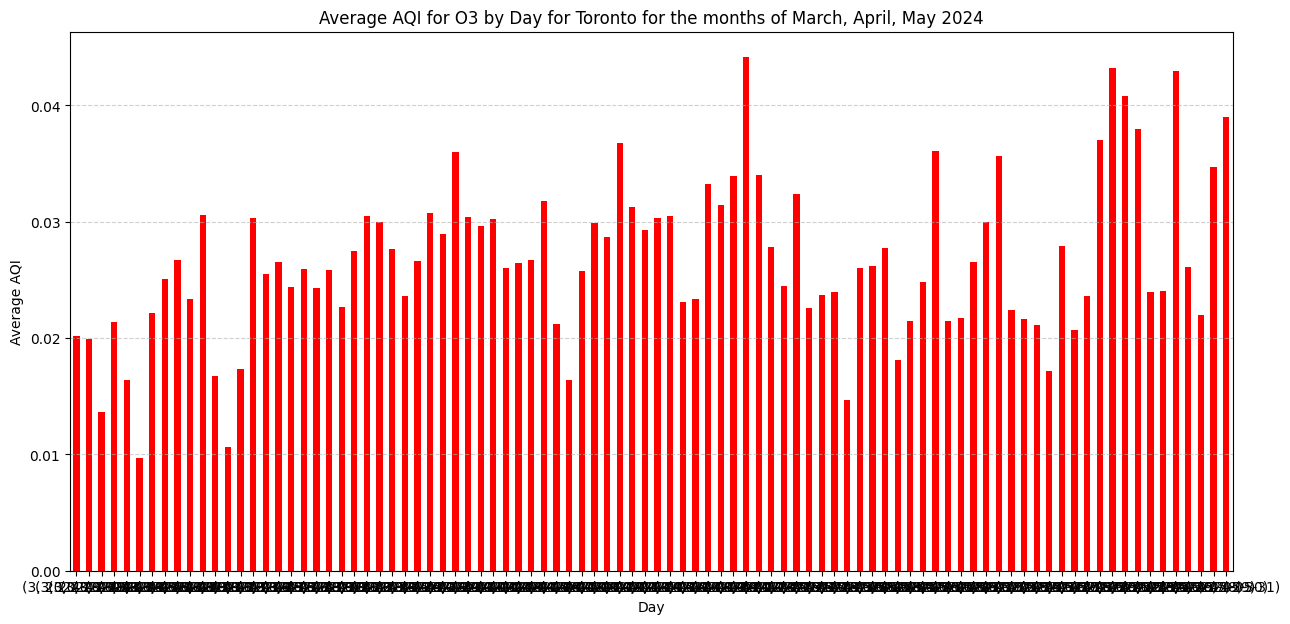

In [26]:

ozone = toronto[toronto['parameter']=='o3']

O3_aqi= ozone.groupby(['month_only', 'date_only'])['value'].mean()


plt.figure(figsize=(15, 7))
O3_aqi.plot(kind='bar', color='red')
plt.title('Average AQI for O3 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

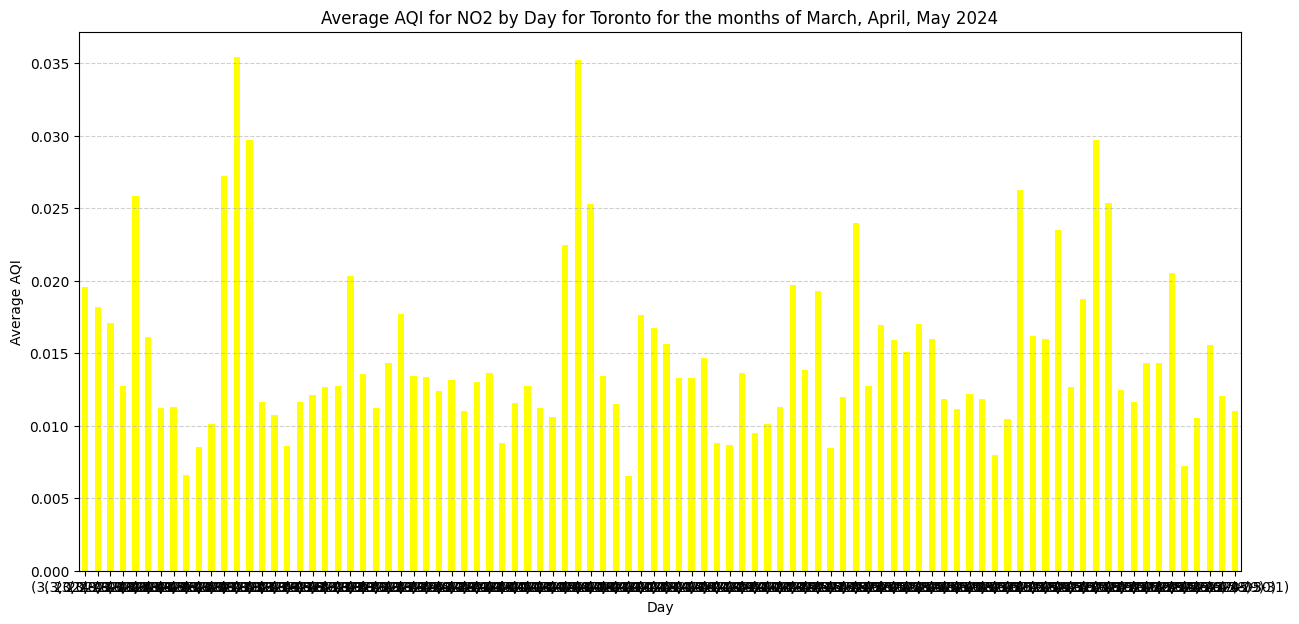

In [24]:
nitrogen_dioxide =toronto[toronto['parameter']=='no2']
No2_aqi = nitrogen_dioxide.groupby(['month_only', 'date_only'])['value'].mean()
plt.figure(figsize=(15, 7))
No2_aqi.plot(kind='bar', color='yellow')
plt.title('Average AQI for NO2 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

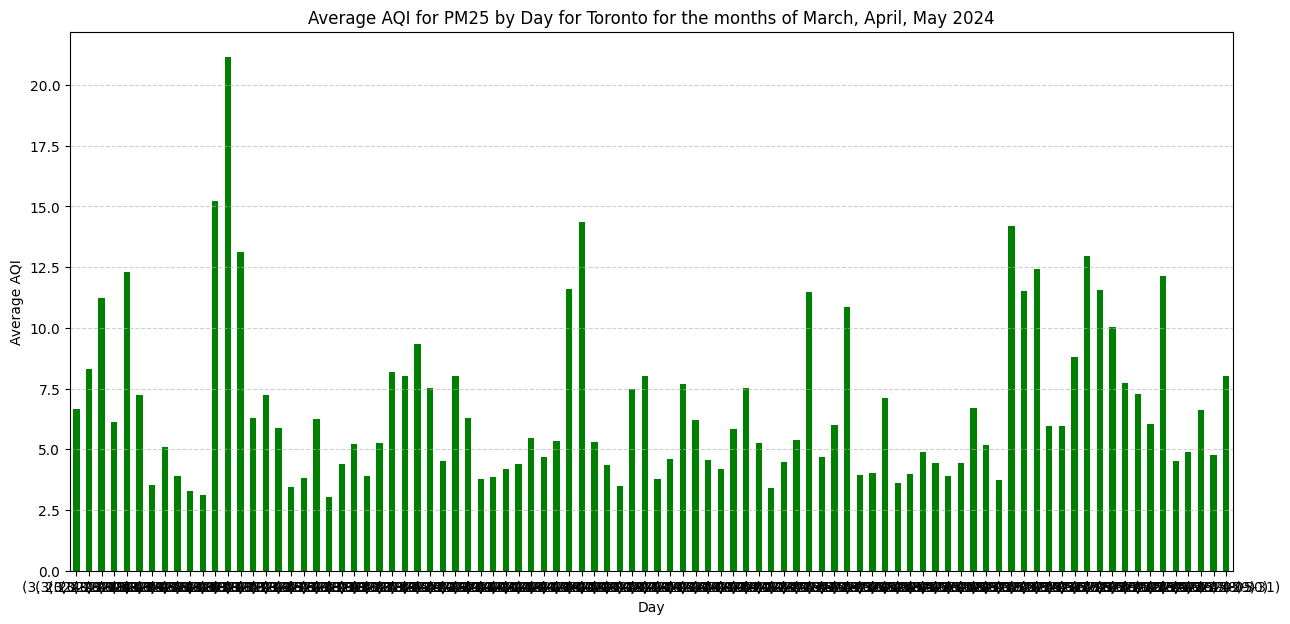

In [25]:
pm=toronto[toronto['parameter']=='pm25']
Pm25_aqi=pm.groupby(['month_only', 'date_only'])['value'].mean()
plt.figure(figsize=(15, 7))
Pm25_aqi.plot(kind='bar', color='green')
plt.title('Average AQI for PM25 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# line plots

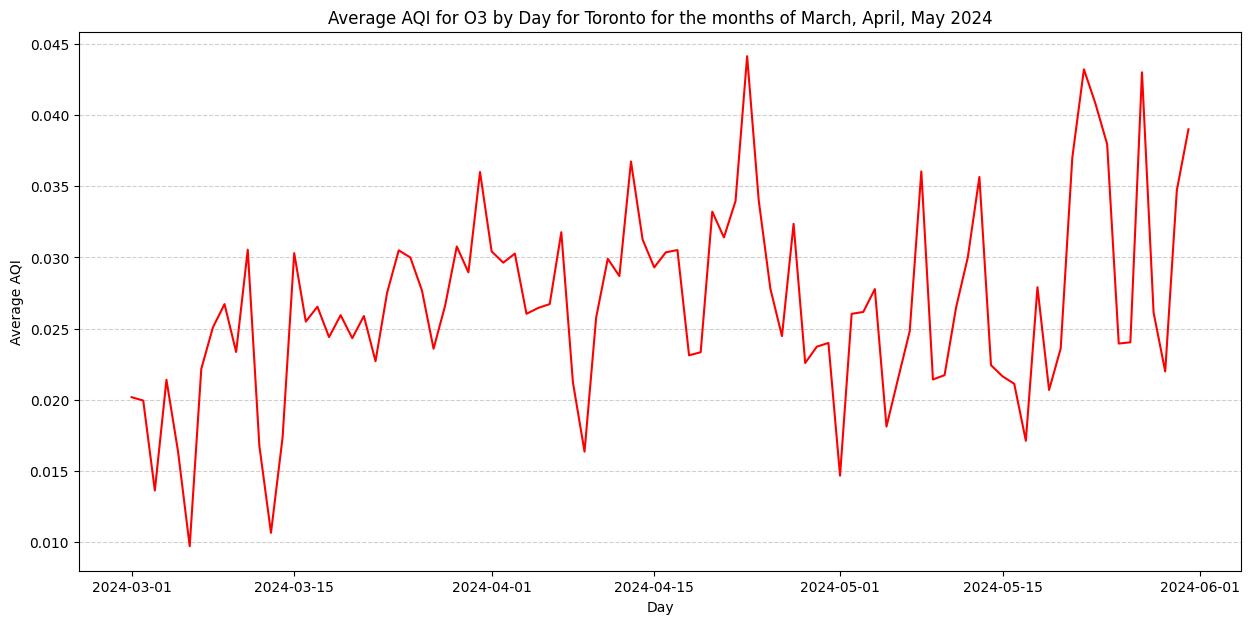

In [27]:
ozone = toronto[toronto['parameter']=='o3']

O3_aqi= ozone.groupby(['date_only'])['value'].mean()


plt.figure(figsize=(15, 7))
O3_aqi.plot(kind='line', color='red')
plt.title('Average AQI for O3 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

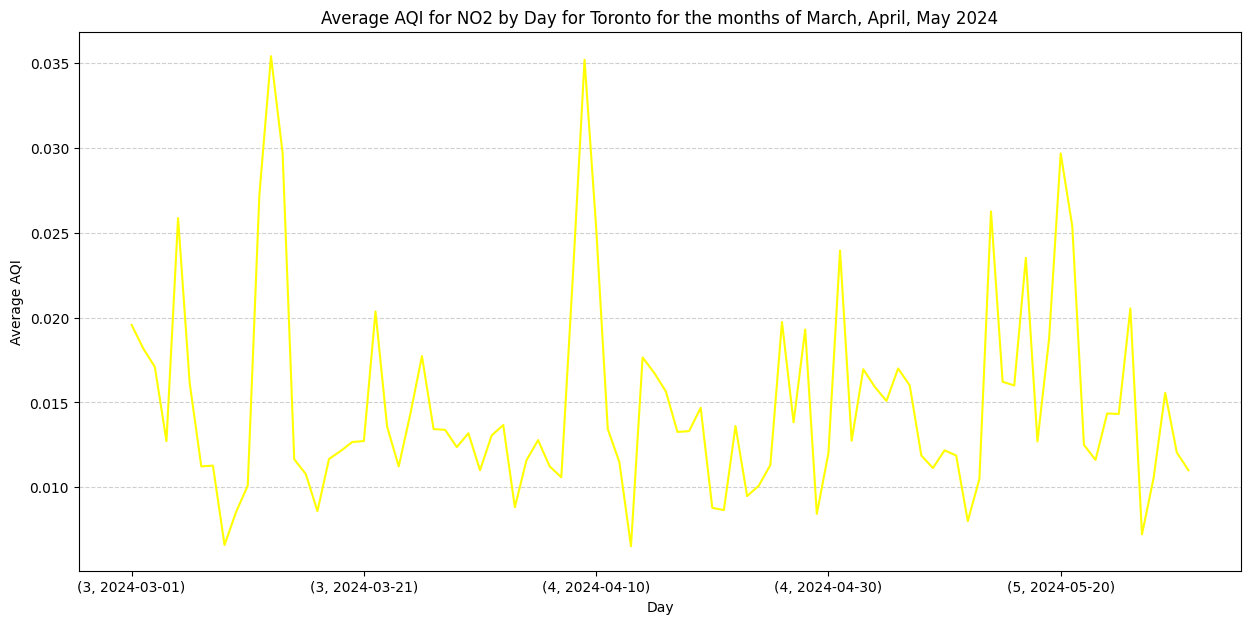

In [28]:
nitrogen_dioxide =toronto[toronto['parameter']=='no2']
No2_aqi = nitrogen_dioxide.groupby(['month_only', 'date_only'])['value'].mean()
plt.figure(figsize=(15, 7))
No2_aqi.plot(kind='line', color='yellow')
plt.title('Average AQI for NO2 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

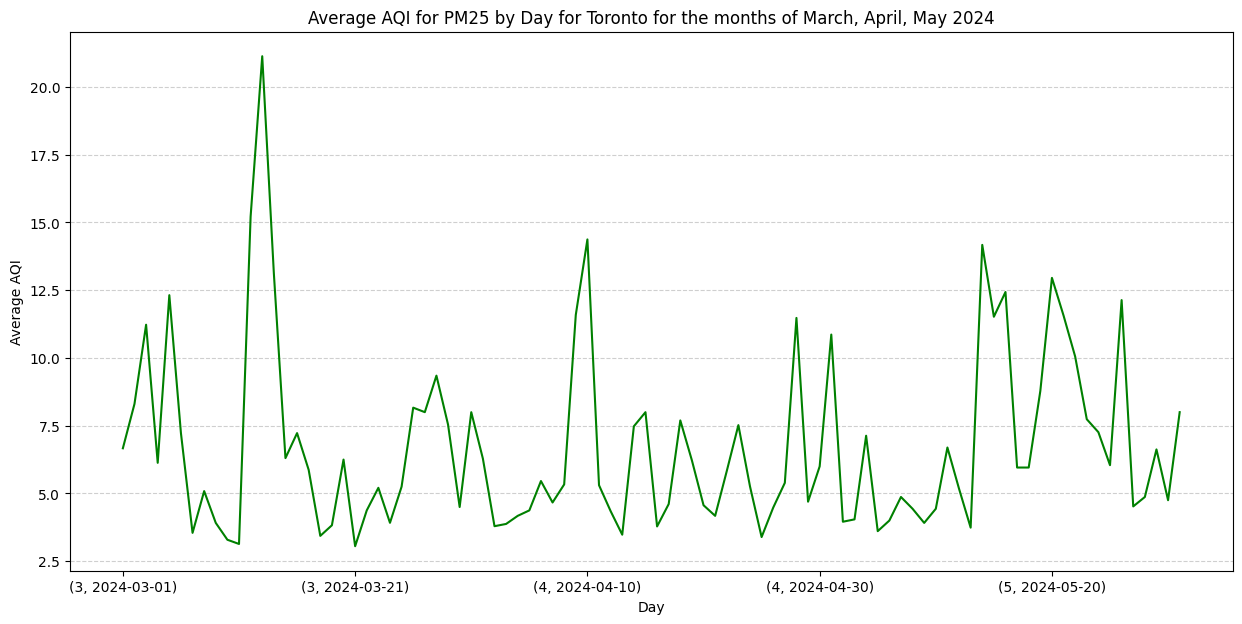

In [29]:
pm=toronto[toronto['parameter']=='pm25']
Pm25_aqi=pm.groupby(['month_only', 'date_only'])['value'].mean()
plt.figure(figsize=(15, 7))
Pm25_aqi.plot(kind='line', color='green')
plt.title('Average AQI for PM25 by Day for Toronto for the months of March, April, May 2024')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# as seen from both the barplot and line 
## O3 levels are higher than that of No2 levels in Toronto 
## while the PM25 level is mostly below 7.5

# Heat map to show correlation

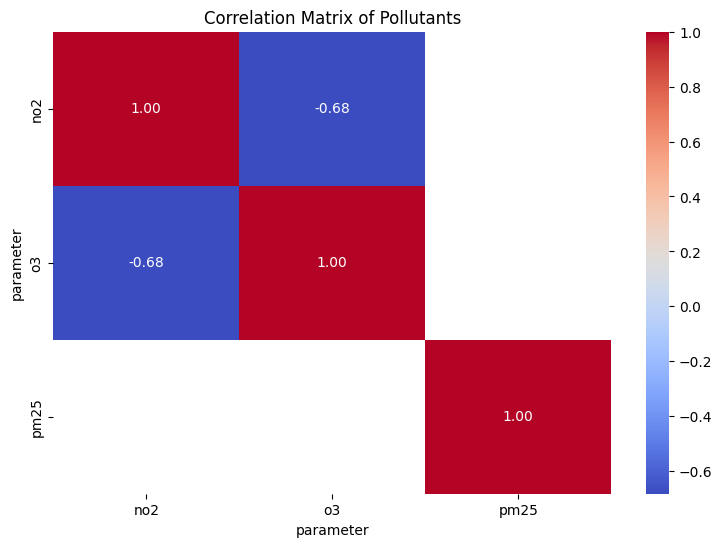

In [32]:
pivot= pd.pivot_table(toronto, 
                      index=['datetimeUtc', 'location_name', 'unit'], 
                      columns='parameter', 
                      values='value', 
                      aggfunc='mean')
pivot.reset_index(inplace=True)
pivot = pivot[['location_name', 'datetimeUtc', 'o3','no2','pm25','unit']]
pollutants = ['no2', 'o3', 'pm25']
correlation_matrix = pivot[pollutants].corr()
plt.figure(figsize=(9, 6))
plt.title('Correlation Matrix of Pollutants')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.show()

## The air quality in Toronto Canada is ideal for outdoor activities
## They maintain this air quality by reduced emmission from traffic, industrial sources and reduced use of natural gases as electric vehicle, stoves and carbon emmission taxes on industries become popular in Toronto canada and encouragement from the government to use the above.